In [41]:
import numpy as np # linear algebra
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
import os
from sklearn.metrics import accuracy_score

In [3]:
list_img=os.listdir("C:/Users/LENOVO/Desktop/smile detector/lfwcrop_grey/faces")

FAST_RUN = False
IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=1 # RGB color

In [4]:
smile=[]
no_smile=[]

txt_smile=open('C:/Users/LENOVO/Desktop/smile detector/SMILE_list.txt', 'r',encoding="utf8")
smile_list = txt_smile.read().split('\n')
txt_nosmile=open('C:/Users/LENOVO/Desktop/smile detector/NON-SMILE_list.txt', 'r',encoding="utf8")
nosmile_list = txt_nosmile.read().split('\n')

In [5]:
filenames=[]
categories=[]
for i in smile_list:
    if i[:-4]+".pgm" in list_img:
        filenames.append(i[:-4]+".pgm")
        categories.append(1)
for i in nosmile_list:
    if i[:-4]+".pgm" in list_img:
        filenames.append(i[:-4]+".pgm")
        categories.append(0)

In [6]:
len(filenames)

1203

In [7]:
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [8]:
df = df.sample(frac=1).reset_index(drop=True)

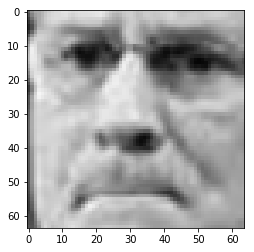

In [9]:
image = load_img("C:/Users/LENOVO/Desktop/smile detector/lfwcrop_grey/faces/"
                 +df["filename"][0],grayscale=True)
plt.imshow(image)

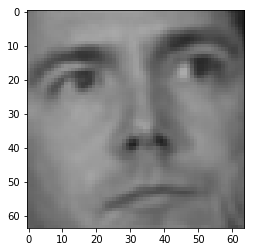

In [10]:
image = load_img("C:/Users/LENOVO/Desktop/smile detector/lfwcrop_grey/faces/"
                 +df["filename"][1],grayscale=True)
plt.imshow(image)

In [11]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
__________

In [12]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [13]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [14]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

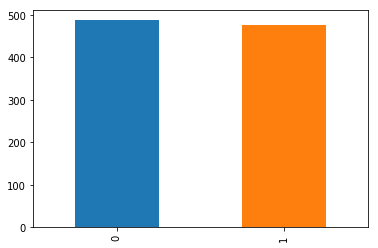

In [15]:
train_df['category'].value_counts().plot.bar()


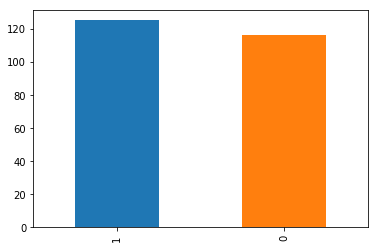

In [16]:
validate_df['category'].value_counts().plot.bar()


In [17]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [18]:
np.array(image)

array([[113, 119, 124, ...,  43,  36,  28],
       [118, 122, 126, ...,  47,  37,  30],
       [119, 123, 126, ...,  47,  36,  30],
       ...,
       [ 95,  92,  95, ...,  93,  97,  93],
       [ 95,  92,  93, ...,  89,  97,  96],
       [ 98,  93,  91, ...,  74,  84,  91]], dtype=uint8)

In [19]:
train_data=[]
for i in df["filename"]:
    image = np.array(load_img("C:/Users/LENOVO/Desktop/smile detector/lfwcrop_grey/faces/"
                 +i,grayscale=True))
    train_data.append(image)

In [20]:
train_data=np.array(train_data)

In [21]:
train_data1=train_data.reshape((1203, 64, 64, 1))

In [22]:
model.fit(x=train_data1,y=df["category"].values,batch_size=50,epochs=10,verbose=1)

Epoch 1/10
1203/1203 [==============================] - 56s 46ms/step - loss: 0.4109 - acc: 0.8645
Epoch 2/10
1203/1203 [==============================] - 50s 41ms/step - loss: 0.1700 - acc: 0.9393
Epoch 3/10
1203/1203 [==============================] - 52s 43ms/step - loss: 0.1223 - acc: 0.9651
Epoch 4/10
1203/1203 [==============================] - 51s 43ms/step - loss: 0.1235 - acc: 0.9576
Epoch 5/10
1203/1203 [==============================] - 49s 41ms/step - loss: 0.1001 - acc: 0.9659
Epoch 6/10
1203/1203 [==============================] - 47s 39ms/step - loss: 0.0764 - acc: 0.9684
Epoch 7/10
1203/1203 [==============================] - 48s 40ms/step - loss: 0.0776 - acc: 0.9692
Epoch 8/10
1203/1203 [==============================] - 48s 40ms/step - loss: 0.0386 - acc: 0.9875
Epoch 9/10
1203/1203 [==============================] - 47s 39ms/step - loss: 0.0528 - acc: 0.9817
Epoch 10/10
1203/1203 [==============================] - 47s 39ms/step - loss: 0.0579 - acc: 0.9834


In [25]:
valid_data=[]
for i in validate_df["filename"]:
    image = np.array(load_img("C:/Users/LENOVO/Desktop/smile detector/lfwcrop_grey/faces/"
                 +i,grayscale=True))
    valid_data.append(image)
valid_data=np.array(valid_data)

In [27]:
valid_data=valid_data.reshape((241, 64, 64, 1))

In [45]:
print(model.predict_classes(valid_data[0].reshape(1,64,64,1))[0][0])
print(validate_df["category"][0])

1
1


In [42]:
y_pred=model.predict_classes(valid_data)
y_true=validate_df["category"].values

In [43]:
accuracy_score(y_true, y_pred)

0.991701244813278

In [46]:
model.save('my_model.h5')

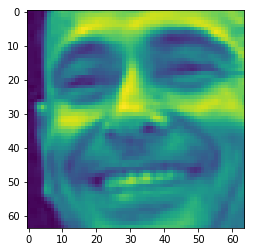

In [51]:
plt.imshow(valid_data[0].reshape(64,64))